<a href="https://colab.research.google.com/github/Yunkoo-GIT/Programming/blob/main/20210520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
 deer  dog bird ship
[1,  2000] loss: 2.182
[1,  4000] loss: 1.845
[1,  6000] loss: 1.689
[1,  8000] loss: 1.574
[1, 10000] loss: 1.535
[1, 12000] loss: 1.478
[2,  2000] loss: 1.401
[2,  4000] loss: 1.378
[2,  6000] loss: 1.355
[2,  8000] loss: 1.333
[2, 10000] loss: 1.326
[2, 12000] loss: 1.315
[3,  2000] loss: 1.245
[3,  4000] loss: 1.224
[3,  6000] loss: 1.224
[3,  8000] loss: 1.211
[3, 10000] loss: 1.211
[3, 12000] loss: 1.198
[4,  2000] loss: 1.109
[4,  4000] loss: 1.148
[4,  6000] loss: 1.143
[4,  8000] loss: 1.130
[4, 10000] loss: 1.109
[4, 12000] loss: 1.118
[5,  2000] loss: 1.052
[5,  4000] loss: 1.040
[5,  6000] loss: 1.069
[5,  8000] loss: 1.064
[5, 10000] loss: 1.069
[5, 12000] loss: 1.081
[6,  2000] loss: 0.980
[6,  4000] loss: 1.011
[6,  6000] loss: 1.012
[6,  8000] loss: 1.029
[6, 10000] loss: 1.015
[6, 12000] loss: 1.026
[7,  2000] loss: 0.932
[7,  4000] loss: 0.961
[7,  6000] loss

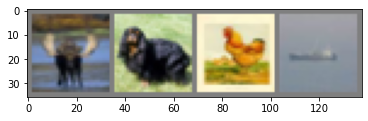

In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5   #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(''.join('%5s'% classes[labels[j]] for j in range(4)))

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):  #에포크 수

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data  #학습 데이터
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:  #매 2000 mini-batch 별로 출력
      print('[%d, %5d] loss: %.3f'% (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')